In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Datasets1/Reviews.csv")

In [ ]:
dataset=dataset.drop(columns=['asin','name','helpfulVotes','date','verified'],axis=1)

In [ ]:
dataset

,rating,title,body
0,3,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...
1,1,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...
2,5,Love This Phone,"This is a great, reliable phone. I also purcha..."
3,3,"Love the Phone, BUT...!","I love the phone and all, because I really did..."
4,4,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...
...,...,...,...
67981,5,"Awesome Phone, but finger scanner is a big mis...",I love the camera on this phone. The screen is...
67982,5,Simply Amazing!,I've been an Xperia user for several years and...
67983,5,"great phon3, but many bugs need to fix. still ...",buy one more for my cousin
67984,5,Phone is like new,Product looks and works like new. Very much re...


In [ ]:
dataset.isnull().sum()

rating     0
title     14
body      21
dtype: int64

In [ ]:
dataset['body'] = dataset['body'].fillna('').apply(str)
dataset['title'] = dataset['title'].fillna('').apply(str)


In [ ]:
#bodynull=dataset[dataset["body"].isnull()].index.tolist()
#dataset=dataset.drop(bodynull,axis=0)

In [ ]:
#titlenull=dataset[dataset["title"].isnull()].index.tolist()
#dataset=dataset.drop(titlenull,axis=0)

In [ ]:
dataset.isnull().sum()

rating    0
title     0
body      0
dtype: int64

In [ ]:
a=[]
a=dataset["rating"].tolist()
len(a)

67986

In [ ]:
d=[]
for i in range(len(a)):
    if a[i]>=3:
        d.append(1)
    else:
        d.append(0)     
d

[1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,


In [ ]:
dt=pd.DataFrame(d,columns=['emotion'])
dt

,emotion
0,1
1,0
2,1
3,1
4,1
...,...
67981,1
67982,1
67983,1
67984,1


In [ ]:
data1=pd.concat([dataset,dt],axis=1)
data1.head()

,rating,title,body,emotion
0,3,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1
1,1,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,0
2,5,Love This Phone,"This is a great, reliable phone. I also purcha...",1
3,3,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1
4,4,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1


In [ ]:
data1["Review"]=data1[["title","body"]].agg(' '.join,axis=1)

In [ ]:
data1.drop(['title','body','rating'],axis=1,inplace=True)

In [ ]:
data2=data1

In [ ]:
data2

,emotion,Review
0,1,"Def not best, but not worst I had the Samsung ..."
1,0,Text Messaging Doesn't Work Due to a software ...
2,1,"Love This Phone This is a great, reliable phon..."
3,1,"Love the Phone, BUT...! I love the phone and a..."
4,1,"Great phone service and options, lousy case! T..."
...,...,...
67981,1,"Awesome Phone, but finger scanner is a big mis..."
67982,1,Simply Amazing! I've been an Xperia user for s...
67983,1,"great phon3, but many bugs need to fix. still ..."
67984,1,Phone is like new Product looks and works like...


In [ ]:
data2.shape

(67986, 2)

In [ ]:
input=data2["Review"]
input

0        Def not best, but not worst I had the Samsung ...
1        Text Messaging Doesn't Work Due to a software ...
2        Love This Phone This is a great, reliable phon...
3        Love the Phone, BUT...! I love the phone and a...
4        Great phone service and options, lousy case! T...
                               ...                        
67981    Awesome Phone, but finger scanner is a big mis...
67982    Simply Amazing! I've been an Xperia user for s...
67983    great phon3, but many bugs need to fix. still ...
67984    Phone is like new Product looks and works like...
67985    Outstanding phone for the price I love the siz...
Name: Review, Length: 67986, dtype: object

In [ ]:
target=data2["emotion"]
target

0        1
1        0
2        1
3        1
4        1
        ..
67981    1
67982    1
67983    1
67984    1
67985    1
Name: emotion, Length: 67986, dtype: int64

In [ ]:
import nltk
from nltk.corpus import stopwords 
nltk.download("stopwords")
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer 
ps = PorterStemmer()
from nltk.stem import WordNetLemmatizer
wordnet=WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
data3=[]
for i in range(0,len(input)):
    rev = input[i]
    rev = re.sub('[^a-zA-Z]', ' ',rev)
    rev = rev.lower()
    rev = rev.split()
    rev = [ps.stem(word) for word in rev if not word in set(stopwords.words('english'))]
    rev = [wordnet.lemmatize(word) for word in rev if not word in set(stopwords.words('english'))]
    rev = ' '.join(rev)
    data3.append(rev)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2000)
x = cv.fit_transform(data3).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,target,test_size = 0.3, random_state = 0)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
model =  Sequential()

In [ ]:
model.add(Dense(units = 2000,kernel_initializer = "random_uniform",activation= "relu"))
model.add(Dense(units = 4000,kernel_initializer = "random_uniform",activation= "relu"))
#model.add(Dropout(0.2))
model.add(Dense(units = 4000,kernel_initializer = "random_uniform",activation= "relu"))
#model.add(Dropout(0.2))
model.add(Dense(units = 1,kernel_initializer = "random_uniform",activation= "sigmoid"))
model.compile(optimizer = "rmsprop",loss = "binary_crossentropy",metrics = ["accuracy"])
model.fit(x_train,y_train, batch_size=32,epochs = 20,validation_data = (x_test,y_test))

Epoch 1/20
1488/1488 [==============================] - 23s 15ms/step - loss: 0.3098 - accuracy: 0.8966 - val_loss: 0.2764 - val_accuracy: 0.9085
Epoch 2/20
1488/1488 [==============================] - 22s 15ms/step - loss: 0.2496 - accuracy: 0.9201 - val_loss: 0.3049 - val_accuracy: 0.9163
Epoch 3/20
1488/1488 [==============================] - 22s 15ms/step - loss: 0.2435 - accuracy: 0.9296 - val_loss: 0.4138 - val_accuracy: 0.9184
Epoch 4/20
1488/1488 [==============================] - 22s 15ms/step - loss: 0.2349 - accuracy: 0.9393 - val_loss: 0.7993 - val_accuracy: 0.9123
Epoch 5/20
1488/1488 [==============================] - 22s 15ms/step - loss: 0.2168 - accuracy: 0.9490 - val_loss: 0.4875 - val_accuracy: 0.9145
Epoch 6/20
1488/1488 [==============================] - 22s 15ms/step - loss: 0.2006 - accuracy: 0.9574 - val_loss: 1.4186 - val_accuracy: 0.9131
Epoch 7/20
1488/1488 [==============================] - 22s 15ms/step - loss: 0.1797 - accuracy: 0.9651 - val_loss: 2.0000 -

In [ ]:
import pickle
pickle.dump(cv,open('count_vec.pkl','wb'))

In [ ]:
pred = model.predict(x_test)
pred = pred>0.5

Text(0.5, 12.5, 'predicted label')

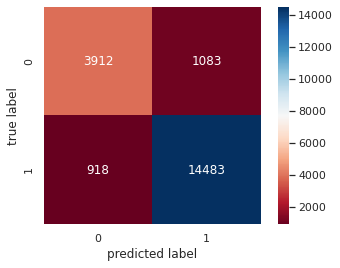

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
mat= confusion_matrix(y_test, pred)
axes=sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=True,cmap=plt.cm.RdBu)
plt.ylabel('true label')
plt.xlabel('predicted label')

In [ ]:
model.save('phone.h5')

In [ ]:
pred

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
y_test

31813    1
14863    1
26670    1
41766    0
7347     1
        ..
37605    1
7256     0
67766    1
22511    1
46616    1
Name: emotion, Length: 20396, dtype: int64

In [ ]:
text = "I've had this phone for over a year and I really like it. Having never been partial to flip phones, I can appreciate this Nokia's features. The color screen is very nice and all of the features are easy to use. The keylock is a simple two-button sequence though I do wish it had a timer for the keylock like my old phone. It has a lot of useful features, like a calculator, organizer, stopwatch and alarm, but the three games it has are too lame to play. The customizable features are nice, but lacking in variety. This isn't the ideal phone for a guy. You're few options are pretty girly. The ringtones also lack something to be desired, but there are a few decent ones. The battery life is pretty good, nothing special, but definitely not bad. It gets me through the average day without problems and sometimes lasts for several days. My parents, sisters, and husband all got fancy Samsung flip phones with cameras and all the toys, and I must say mine works better. The battery lasts MUCH longer and the recpetion is MUCH better. The downside to this cute phone is the case. It's made of very weak plastic that cracked in a few months. Also, if you're thinking about getting a different case for it, DON'T! Once you take it off, it will keep slipping off. It never attaches firmly again, and neither does the new case you bought. I've read this in other reviews too. Because of this, the last time I dropped it the back piece popped off and the battery flew out. Now my phone has issues. Drat. Overall, it's a great phone, if you're content with the simpler things in life. Who really uses the camera on thier phone anyway? I just reccommend buying a protective case for it and leaving it on and don't drop the delicate thing."

text = re.sub('[^a-zA-Z]', ' ',text)
text = text.lower()
text = text.split() 
    
text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
text = ' '.join(text)
yp = model.predict(cv.transform([text]))
yp>0.5

array([[ True]])

In [ ]:
text = "Slow, annoying, fragile, heavy, and bulky..."

text = re.sub('[^a-zA-Z]', ' ',text)
text = text.lower()
text = text.split() 
    
text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
text = ' '.join(text)
yp = model.predict(cv.transform([text]))
yp>0.5

array([[False]])

In [ ]:
text = "This is a bad product"

text = re.sub('[^a-zA-Z]', ' ',text)
text = text.lower()
text = text.split() 
    
text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
text = ' '.join(text)
yp = model.predict(cv.transform([text]))
yp>0.5

array([[False]])